### Batch: PGPDSBA Online Sep_A 2021
#### Student: Hemant Patidar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)

## Problem 1 (Wholesale Customers Analysis)

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
df_wca = pd.read_csv("Wholesale Customer.csv");

In [3]:
df_wca.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df_wca.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

* The dataset doesn't have any null/blank values

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [5]:
df_wca['Total Spending'] = df_wca['Fresh'] + df_wca['Milk'] + df_wca['Grocery'] + df_wca['Frozen'] + df_wca['Detergents_Paper'] + df_wca['Delicatessen']

In [6]:
df_wca.groupby(['Region','Channel']).sum()

Buyer/Spender    Fresh     Milk  Grocery  Frozen  \
Region Channel                                                     
Lisbon Hotel            14026   761233   228342   237542  184512   
       Retail            4069    93600   194112   332495   46514   
Oporto Hotel             8988   326215    64519   123074  160861   
       Retail            5911   138506   174625   310200   29271   
Other  Hotel            48020  2928269   735753   820101  771606   
       Retail           16006  1032308  1153006  1675150  158886   

                Detergents_Paper  Delicatessen  Total Spending  
Region Channel                                                  
Lisbon Hotel               56081         70632         1538342  
       Retail             148055         33695          848471  
Oporto Hotel               13516         30965          719150  
       Retail             159795         23541          835938  
Other  Hotel              165990        320358         5742077  
       Retail             724420        191752         4935522

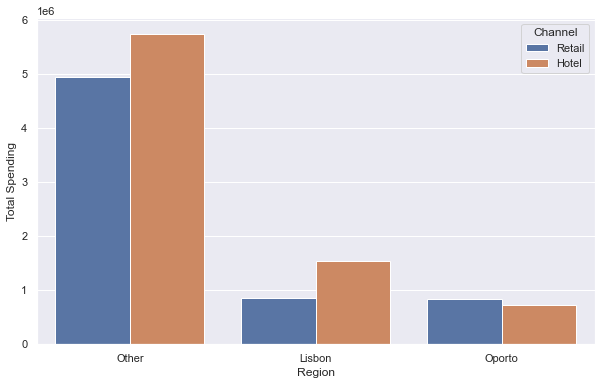

In [7]:
plt.figure(figsize=(10,6));
sns.barplot(x=df_wca['Region'],y=df_wca['Total Spending'], hue=df_wca['Channel'],estimator=np.sum, ci=None);

In [8]:
df_wca.groupby('Channel').sum().reset_index()[['Channel','Total Spending']]

,Channel,Total Spending
0,Hotel,7999569
1,Retail,6619931


In [9]:
df_wca.groupby('Region').sum().reset_index()[['Region','Total Spending']]

,Region,Total Spending
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [10]:
df_wca.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total Spending,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [11]:
df = df_wca.drop(['Buyer/Spender','Total Spending'],axis=1)
df.groupby('Region').describe()[[('Fresh','count'),('Fresh','mean'),('Fresh','std'),
                                 ('Milk','mean'),('Milk','std'),
                                 ('Grocery','mean'),('Grocery','std'),
                                 ('Frozen','mean'),('Frozen','std'),
                                 ('Detergents_Paper','mean'),('Detergents_Paper','std'),
                                 ('Delicatessen','mean'),('Delicatessen','std')]].T

Region                        Lisbon        Oporto         Other
Fresh            count     77.000000     47.000000    316.000000
                 mean   11101.727273   9887.680851  12533.471519
                 std    11557.438575   8387.899211  13389.213115
Milk             mean    5486.415584   5088.170213   5977.085443
                 std     5704.856079   5826.343145   7935.463443
Grocery          mean    7403.077922   9218.595745   7896.363924
                 std     8496.287728  10842.745314   9537.287778
Frozen           mean    3000.337662   4045.361702   2944.594937
                 std     3092.143894   9151.784954   4260.126243
Detergents_Paper mean    2651.116883   3687.468085   2817.753165
                 std     4208.462708   6514.717668   4593.051613
Delicatessen     mean    1354.896104   1159.702128   1620.601266
                 std     1345.423340   1050.739841   3232.581660

In [12]:
df = df_wca.drop(['Buyer/Spender','Total Spending'],axis=1)
df.groupby('Channel').describe()[[('Fresh','count'),('Fresh','mean'),('Fresh','std'),
                                 ('Milk','mean'),('Milk','std'),
                                 ('Grocery','mean'),('Grocery','std'),
                                 ('Frozen','mean'),('Frozen','std'),
                                 ('Detergents_Paper','mean'),('Detergents_Paper','std'),
                                 ('Delicatessen','mean'),('Delicatessen','std')]].T

Channel                        Hotel        Retail
Fresh            count    298.000000    142.000000
                 mean   13475.560403   8904.323944
                 std    13831.687502   8987.714750
Milk             mean    3451.724832  10716.500000
                 std     4352.165571   9679.631351
Grocery          mean    3962.137584  16322.852113
                 std     3545.513391  12267.318094
Frozen           mean    3748.251678   1652.612676
                 std     5643.912500   1812.803662
Detergents_Paper mean     790.560403   7269.507042
                 std     1104.093673   6291.089697
Delicatessen     mean    1415.956376   1753.436620
                 std     3147.426922   1953.797047

### 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [13]:
df_des = df_wca.drop(['Buyer/Spender','Total Spending'],axis=1).describe().T
df_des['CV'] = df_des['std']/df_des['mean']
df_des.reset_index(inplace=True)
df_des[['index','CV']]

,index,CV
0,Fresh,1.053918
1,Milk,1.273299
2,Grocery,1.195174
3,Frozen,1.580332
4,Detergents_Paper,1.654647
5,Delicatessen,1.849407


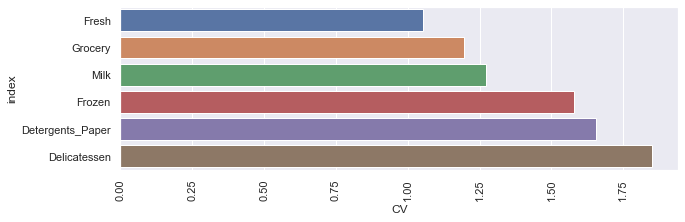

In [14]:
plt.figure(figsize=(10,3))
sns.barplot(y = 'index', x = 'CV', data = df_des, order = df_des.sort_values(by='CV')['index']);

plt.xticks(rotation=90);

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

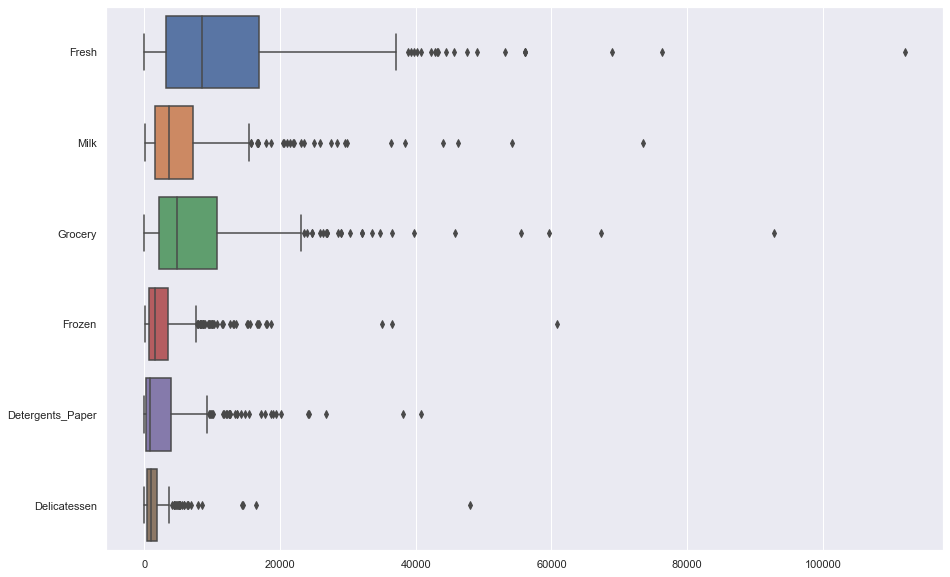

In [15]:
plt.figure(figsize=(15,10))
#df_wca.drop(['Buyer/Spender','Total Spending'],axis=1).boxplot(vert=False);

sns.boxplot(data = df_wca.drop(['Buyer/Spender','Total Spending'],axis=1), orient = 'h');

In [16]:
df = df_wca.drop(['Buyer/Spender','Total Spending'],axis=1).describe().T
df['IQR'] = df['75%'] - df['25%']
df['Q1-1.5IQR'] = df['25%'] - 1.5*df['IQR']
df['Q3+1.5IQR'] = df['75%'] + 1.5*df['IQR']
df[['IQR','Q1-1.5IQR','Q3+1.5IQR']]

,IQR,Q1-1.5IQR,Q3+1.5IQR
Fresh,13806.00,-17581.250,37642.750
Milk,5657.25,-6952.875,15676.125
Grocery,8502.75,-10601.125,23409.875
Frozen,2812.00,-3475.750,7772.250
Detergents_Paper,3665.25,-5241.125,9419.875
Delicatessen,1412.00,-1709.750,3938.250


In [17]:
for i in df.index:
    print(i,df_wca[df_wca[i] > df['Q3+1.5IQR'][i]][i].count())

Fresh 20
Milk 28
Grocery 24
Frozen 43
Detergents_Paper 30
Delicatessen 27


### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [18]:
df_wca.groupby(['Channel','Region']).describe().T

Channel                      Hotel                               \
Region                      Lisbon        Oporto          Other   
Buyer/Spender  count     59.000000      28.00000     211.000000   
               mean     237.728814     321.00000     227.582938   
               std       21.411269      12.26256     139.651493   
               min      197.000000     295.00000       4.000000   
               25%      221.500000     313.50000     113.500000   
...                            ...           ...            ...   
Total Spending min     4925.000000    4129.00000     904.000000   
               25%    15392.500000   16786.00000   13485.000000   
               50%    22287.000000   22134.50000   19789.000000   
               75%    30188.500000   28781.25000   33593.500000   
               max    73243.000000  130877.00000  190169.000000   

Channel                      Retail                                
Region                       Lisbon         Oporto          Other  
Buyer/Spender  count      18.000000      19.000000     105.000000  
               mean      226.055556     311.105263     152.438095  
               std        23.725073      13.904015     138.867530  
               min       198.000000     294.000000       1.000000  
               25%       208.500000     301.500000      46.000000  
...                             ...            ...            ...  
Total Spending min     18342.000000   17598.000000   14993.000000  
               25%     33649.500000   29264.000000   30091.000000  
               50%     41989.000000   36446.000000   37085.000000  
               75%     52830.500000   50788.500000   51064.000000  
               max    107155.000000  120291.000000  199891.000000  

[64 rows x 6 columns]

## Problem 2 (Survey)

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [19]:
dfs = pd.read_csv('Survey-1.csv')

In [20]:
dfs.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [89]:
dfs["Computer"].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

### 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

In [22]:
ct21 = pd.crosstab(dfs['Gender'],dfs['Major'],margins=True)
ct21

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


#### 2.1.2. Gender and Grad Intention

In [23]:
ct22 = pd.crosstab(dfs['Gender'],dfs['Grad Intention'],margins=True)
ct22

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


#### 2.1.3. Gender and Employment

In [24]:
ct23 = pd.crosstab(dfs['Gender'],dfs['Employment'],margins=True)
ct23

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


#### 2.1.4. Gender and Computer

In [25]:
ct24 = pd.crosstab(dfs['Gender'],dfs['Computer'],margins=True)
ct24

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### 2.2 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [26]:
Gen = dfs['Gender'].value_counts()

In [27]:
P_Male = Gen['Male']/(Gen['Male'] + Gen['Female'])
P_Male

0.46774193548387094

#### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [28]:
P_Female = Gen['Female']/(Gen['Male'] + Gen['Female'])
P_Female

0.532258064516129

### 2.3 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [29]:
cp = pd.crosstab(dfs['Gender'],dfs['Major'],margins=True, normalize=True)
cp

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,0.048387,0.048387,0.112903,0.064516,0.064516,0.048387,0.145161,0.000000,0.532258
Male,0.064516,0.016129,0.064516,0.032258,0.096774,0.064516,0.080645,0.048387,0.467742
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387,1.000000


In [30]:
cpm = pd.crosstab(dfs['Gender'],dfs['Major'],margins=True)
cpm.drop(['Female','All'],axis=0,inplace=True)

for i in cpm.columns:
    print("P({0}|Male) = {1}/{2}".format(i,cpm[i][0],cpm['All'][0]))
    

P(Accounting|Male) = 4/29
P(CIS|Male) = 1/29
P(Economics/Finance|Male) = 4/29
P(International Business|Male) = 2/29
P(Management|Male) = 6/29
P(Other|Male) = 4/29
P(Retailing/Marketing|Male) = 5/29
P(Undecided|Male) = 3/29
P(All|Male) = 29/29


#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [31]:
cpm = pd.crosstab(dfs['Gender'],dfs['Major'],margins=True)
cpm.drop(['Male','All'],axis=0,inplace=True)

for i in cpm.columns:
    print("P({0}|Female) = {1}/{2}".format(i,cpm[i][0],cpm['All'][0]))

P(Accounting|Female) = 3/33
P(CIS|Female) = 3/33
P(Economics/Finance|Female) = 7/33
P(International Business|Female) = 4/33
P(Management|Female) = 4/33
P(Other|Female) = 3/33
P(Retailing/Marketing|Female) = 9/33
P(Undecided|Female) = 0/33
P(All|Female) = 33/33


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [32]:
cp = pd.crosstab(dfs['Gender'],dfs['Grad Intention'],margins=True, normalize = True)
cp

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,0.145161,0.209677,0.177419,0.532258
Male,0.048387,0.145161,0.274194,0.467742
All,0.193548,0.354839,0.451613,1.000000


In [33]:
print("Probability of randomly chosen male student intends to graduate {0}%".format(round(cp.iloc[1:2,2:3]['Yes'][0],4)*100))

Probability of randomly chosen male student intends to graduate 27.42%


#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [34]:
cp = pd.crosstab(dfs['Gender'],dfs['Computer'],margins=True, normalize = True)
cp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,0.032258,0.467742,0.032258,0.532258
Male,0.048387,0.419355,0.000000,0.467742
All,0.080645,0.887097,0.032258,1.000000


We can calculate probility of randomly choosen female students NOT having a laptop as -
* Female that have a Desktop
* + Female that have a Tablet

==> 6.45%

### 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [35]:
cp = pd.crosstab(dfs['Gender'],dfs['Employment'],margins=True, normalize = True)
cp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,0.048387,0.387097,0.096774,0.532258
Male,0.112903,0.306452,0.048387,0.467742
All,0.161290,0.693548,0.145161,1.000000


In [36]:
prob = (0.467742 + 0.161290 -0.112903)*100
print("Probability that a randomly chosen student is a male or has a full-time employment would be: {0}%".format(round(prob,2)))

Probability that a randomly chosen student is a male or has a full-time employment would be: 51.61%


#### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [37]:
cp = pd.crosstab(dfs['Gender'],dfs['Major'],margins=True)
cp

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [38]:
female_international_business = 4/33 # 0.064516
female_management = 4/33 # 0.064516
print(round((8/33)*100,2),"%")

24.24 %


### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [39]:
int_df = dfs[dfs['Grad Intention'] != 'Undecided']

cp = pd.crosstab(int_df['Gender'],int_df['Grad Intention'])
cp

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


### 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

#### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

It would be (students having GPA < 3) / (Total students)

In [40]:
str(dfs[dfs.GPA < 3]['ID'].count()) +"/" + str(dfs['ID'].count())

'17/62'

#### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [41]:
dfs.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [42]:
dfs['EarnsMoreThan50'] = dfs.Salary >= 50

In [43]:
ct = pd.crosstab(dfs['Gender'],dfs['EarnsMoreThan50'],margins = True)
ct

EarnsMoreThan50,False,True,All
Gender,,,
Female,15,18,33
Male,15,14,29
All,30,32,62


### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

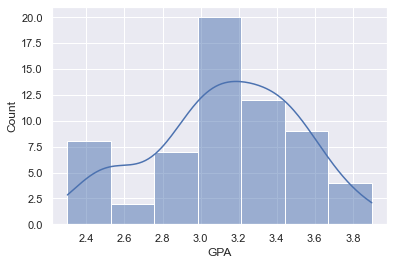

In [44]:
sns.histplot(x=dfs['GPA'],kde=True);

In [45]:
print("Mean: {0}, Median: {1}, Mode: {2}".format(dfs['GPA'].mean(),dfs['GPA'].median(),dfs['GPA'].mode()[1]))
print("Std",dfs['GPA'].std())

mu = dfs['GPA'].mean()
st = dfs['GPA'].std()

Mean: 3.129032258064516, Median: 3.1500000000000004, Mode: 3.1
Std 0.3773883926969118


In [46]:
for i in range(1,4):
    count_bw_1std = dfs[(dfs.GPA >= mu-i*st) & (dfs.GPA <= mu+i*st)]
    print("Probability of data at {0} standard deviation from the mean is: {1}".format(i,count_bw_1std['ID'].count()/dfs['GPA'].count()))

Probability of data at 1 standard deviation from the mean is: 0.7258064516129032
Probability of data at 2 standard deviation from the mean is: 0.967741935483871
Probability of data at 3 standard deviation from the mean is: 1.0


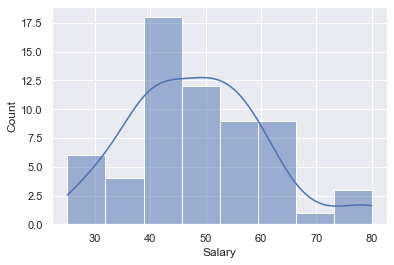

In [47]:
sns.histplot(x=dfs['Salary'],kde=True);

In [48]:
print("Mean: {0}, Median: {1}, Mode: {2}".format(dfs['Salary'].mean(),dfs['Salary'].median(),dfs['Salary'].mode()[0]))
print("Std",dfs['Salary'].std())

mu = dfs['Salary'].mean()
st = dfs['Salary'].std()

Mean: 48.54838709677419, Median: 50.0, Mode: 40.0
Std 12.080912216337277


In [49]:
for i in range(1,4):
    count_bw_1std = dfs[(dfs.Salary >= mu-i*st) & (dfs.Salary <= mu+i*st)]
    print("Probability of data at {0} standard deviation from the mean is: {1}".format(i,count_bw_1std['ID'].count()/dfs['Salary'].count()))

Probability of data at 1 standard deviation from the mean is: 0.7903225806451613
Probability of data at 2 standard deviation from the mean is: 0.9516129032258065
Probability of data at 3 standard deviation from the mean is: 1.0


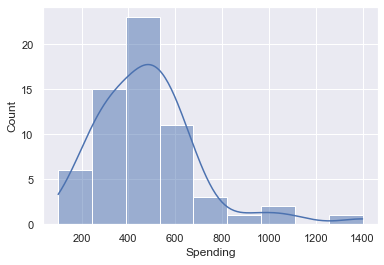

In [50]:
sns.histplot(x=dfs['Spending'],kde=True);

In [51]:
print("Mean: {0}, Median: {1}, Mode: {2}".format(dfs['Spending'].mean(),dfs['Spending'].median(),dfs['Spending'].mode()[0]))
print("Std",dfs['Spending'].std())

mu = dfs['Spending'].mean()
st = dfs['Spending'].std()

Mean: 482.01612903225805, Median: 500.0, Mode: 500
Std 221.95380496596204


In [52]:
for i in range(1,4):
    count_bw_1std = dfs[(dfs.Spending >= mu-i*st) & (dfs.Spending <= mu+i*st)]
    print("Probability of data at {0} standard deviation from the mean is: {1}".format(i,count_bw_1std['ID'].count()/dfs['Spending'].count()))

Probability of data at 1 standard deviation from the mean is: 0.8064516129032258
Probability of data at 2 standard deviation from the mean is: 0.9516129032258065
Probability of data at 3 standard deviation from the mean is: 0.9838709677419355


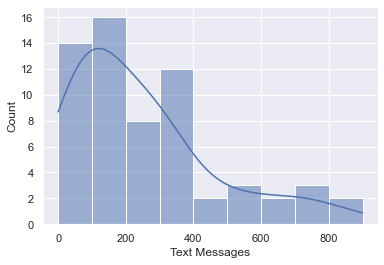

In [53]:
sns.histplot(x=dfs['Text Messages'],kde=True);

In [54]:
print("Mean: {0}, Median: {1}, Mode: {2}".format(dfs['Text Messages'].mean(),dfs['Text Messages'].median(),dfs['Text Messages'].mode()[0]))
print("Std",dfs['Text Messages'].std())

mu = dfs['Text Messages'].mean()
st = dfs['Text Messages'].std()

Mean: 246.20967741935485, Median: 200.0, Mode: 300
Std 214.4659503026961


In [55]:
mu = dfs['Text Messages'].mean()
st = dfs['Text Messages'].std()

In [56]:
for i in range(1,4):
    count_bw_1std = dfs[(dfs['Text Messages'] >= mu-i*st) & (dfs['Text Messages'] <= mu+i*st)]
    print("Probability of data at {0} standard deviation from the mean is: {1}".format(i,count_bw_1std['ID'].count()/dfs['Text Messages'].count()))

Probability of data at 1 standard deviation from the mean is: 0.7903225806451613
Probability of data at 2 standard deviation from the mean is: 0.9193548387096774
Probability of data at 3 standard deviation from the mean is: 0.9838709677419355


In [81]:
print("Skewness of GPA by Fisher-Pearson correlation: ",stats.skew(dfs['GPA']))
print("Skewness of Salary by Fisher-Pearson correlation: ",stats.skew(dfs['Salary']))
print("Skewness of Spending by Fisher-Pearson correlation: ",stats.skew(dfs['Spending']))
print("Skewness of Text Messages by Fisher-Pearson correlation: ",stats.skew(dfs['Text Messages']))

Skewness of GPA by Fisher-Pearson correlation:  -0.3069370607018797
Skewness of Salary by Fisher-Pearson correlation:  0.5216766008645851
Skewness of Spending by Fisher-Pearson correlation:  1.5472850312929523
Skewness of Text Messages by Fisher-Pearson correlation:  1.2642446834439687


## Problem 3 (A & B Shingles)

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [57]:
df_ab = pd.read_csv("A & B shingles-1.csv")

In [58]:
df_ab.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [59]:
df_ab.isnull().sum()

A    0
B    5
dtype: int64

### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Permissible limit --> moisture content should be less than 0.35 pounds per 100 sq.ft.

Stating NULL and ALTERNATE hypothesis for Shingle A...
* H0 -- Mean of moisture content <= 0.35
* HA -- Mean of moisture content > 35

In [60]:
print("Mean of Sample (x̅):",round(df_ab['A'].mean(),3))
print("Standard Deviation of Sample (s):",round(df_ab['A'].std(),3))
print("# of items in Sample (n):",df_ab['A'].count())
print("Population Mean (µ):",0.35)

Mean of Sample (x̅): 0.317
Standard Deviation of Sample (s): 0.136
# of items in Sample (n): 36
Population Mean (µ): 0.35


t =   (x̅ - µ)/( s/ √n)

In [61]:
t = (0.317 - 0.35)/(0.136/6)
t

-1.4558823529411753

In [62]:
t_statistic, p_value = stats.ttest_1samp(df_ab['A'], 0.35)
print("Tstats: {0} \nPvalue: {1}".format(t_statistic, p_value))

Tstats: -1.4735046253382782 
Pvalue: 0.14955266289815025


<b> ttest_1samp calculated the P-value of 2-tailed test but the analysis would be 1-tailed, so P-value = Pvalue/2 </b>

Here we select $\alpha$ = 0.05.

In [63]:
# p_value < 0.05 => Reject NULL hypothesis

alpha_value = 0.05 # Level of significance

if p_value/2 < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

We have no evidence to reject the null hypothesis since p value > Level of significance


#### By this we can conclude that mean moisture content (of Shingle A) is not under permissible limits (0.35).

Stating NULL and ALTERNATE hypothesis for Shingle B...
* H0 -- Mean of moisture content <= 0.35
* HA -- Mean of moisture content > 35

In [64]:
print("Mean of Sample (x̅):",round(df_ab['B'].mean(),3))
print("Standard Deviation of Sample (s):",round(df_ab['B'].std(),3))
print("# of items in Sample (n): {0} (Including Blanks)".format(df_ab['B'].count()))
print("Population Mean (µ):",0.35)

Mean of Sample (x̅): 0.274
Standard Deviation of Sample (s): 0.137
# of items in Sample (n): 31 (Including Blanks)
Population Mean (µ): 0.35


In [65]:
t_statistic, p_value = stats.ttest_1samp(df_ab['B'], 0.35, nan_policy='omit')
print("Tstats: {0} \nPvalue: {1}".format(t_statistic, p_value))

Tstats: -3.1003313069986995 
Pvalue: 0.004180954800638365


<b> ttest_1samp calculated the P-value of 2-tailed test but the analysis would be 1-tailed, so P-value = Pvalue/2 </b>

Here we select $\alpha$ = 0.05 for Shingle B.

In [66]:
# p_value < 0.05 => Reject NULL hypothesis

alpha_value = 0.05 # Level of significance

if p_value/2 < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

We have evidence to reject the null hypothesis since p value < Level of significance


#### By this we can conclude that mean moisture content (of Shingle B) is under permissible limit (0.35)

### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Stating hypothesis -

* $H_0$: $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ $\neq$ $\mu{B}$

In [67]:
t_statistic, p_value  = stats.ttest_ind(df_ab['A'],df_ab['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat 1.2896282719661123
P Value 0.2017496571835306


We have no evidence to Reject NULL hypothere since P-value > Level of significance